## 2.0 Model Training  
### 2.1 Import Data and Required Packages

In [3]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling 
from sklearn.metrics import accuracy_score
# logistic regression
from sklearn.linear_model import LogisticRegression
# naive bayes
from sklearn.naive_bayes import GaussianNB
# Support Vector Machine
from sklearn import svm
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# xgboost
import xgboost as xgb


### 2.2 Import data

In [4]:
df = pd.read_csv('../data/raw/training_2009.csv')

In [5]:
df.head()

,sid,sid_type,first_coop_code,first_dist_code,first_hs_code,first_dist_name,first_hs_name,first_hs_alt,first_hs_urbanicity,chrt_ninth,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
0,2,Fake record,WKEC,415,5194,Everett,Everett,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,Fake record,GRREC,199,1648,Kingfisher,Kingfisher,0,Town: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Fake record,GRREC,142,1564,Diamond Lake,Diamond Lake,0,Rural: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,Fake record,OVEC,238,2230,Orange,Pike,0,Suburb: Large,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Fake record,NKCES,517,7658,Foster,Kent,0,Rural: Fringe,2009,...,NaN,0.5491,0.2428,24458.5,271.53949,0.757102,0.37589,NaN,36100.0,0.591997


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sid                              52942 non-null  int64  
 1   sid_type                         52942 non-null  object 
 2   first_coop_code                  52942 non-null  object 
 3   first_dist_code                  52942 non-null  int64  
 4   first_hs_code                    52942 non-null  int64  
 5   first_dist_name                  52942 non-null  object 
 6   first_hs_name                    52942 non-null  object 
 7   first_hs_alt                     52942 non-null  int64  
 8   first_hs_urbanicity              52484 non-null  object 
 9   chrt_ninth                       52942 non-null  int64  
 10  male                             52931 non-null  float64
 11  race_ethnicity                   52257 non-null  object 
 12  frpl              

### 2.3 Select variables of importance

In [7]:
temp = df[['male', 'race_ethnicity', 'frpl','iep', 'ell', 'ever_alternative', 'ap_ever_take_class',
           'math_ss', 'read_ss','pct_days_absent', 'gpa', 'scale_score_11_eng', 'scale_score_11_math', 
           'scale_score_11_read', 'scale_score_11_comp','hs_diploma']]

In [8]:
temp.to_csv('../data/raw/data_2009.csv', index=False)

In [9]:
cross_tab = pd.crosstab(index=temp['hs_diploma'], columns='count')

# Display the crosstab
print(cross_tab)


col_0       count
hs_diploma       
0            9975
1           42967


### 2.4 Update int to boolean for demographics

In [10]:
temp.loc[temp['male'] == 0, 'male'] = 'female'
temp.loc[temp['male'] == 1, 'male'] = 'male'
temp.loc[temp['ell'] == 0, 'ell'] = 'not_ell'
temp.loc[temp['ell'] == 1, 'ell'] = 'ell'
temp.loc[temp['iep'] == 0, 'iep'] = 'no_iep'
temp.loc[temp['iep'] == 1, 'iep'] = 'iep'
temp.loc[temp['ever_alternative'] == 0, 'ever_alternative'] = 'no_alt'
temp.loc[temp['ever_alternative'] == 1, 'ever_alternative'] = 'yes_alt'
temp.loc[temp['ap_ever_take_class'] == 0, 'ap_ever_take_class'] = 'no_ap'
temp.loc[temp['ap_ever_take_class'] == 1, 'ap_ever_take_class'] = 'yes_ap'
temp.loc[temp['frpl'] == 0, 'frpl'] = 'no_frpl'
temp.loc[temp['frpl'] == 1, 'frpl'] = 'yes_frpl'


In [11]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   male                 52931 non-null  object 
 1   race_ethnicity       52257 non-null  object 
 2   frpl                 52258 non-null  object 
 3   iep                  52942 non-null  object 
 4   ell                  52942 non-null  object 
 5   ever_alternative     52942 non-null  object 
 6   ap_ever_take_class   52942 non-null  object 
 7   math_ss              43953 non-null  float64
 8   read_ss              43967 non-null  float64
 9   pct_days_absent      52855 non-null  float64
 10  gpa                  51720 non-null  float64
 11  scale_score_11_eng   43049 non-null  float64
 12  scale_score_11_math  43042 non-null  float64
 13  scale_score_11_read  43022 non-null  float64
 14  scale_score_11_comp  43012 non-null  float64
 15  hs_diploma           52942 non-null 

In [12]:
vars = temp.columns
unique_values_counts = temp.nunique()


# Display the result
print(unique_values_counts)

male                       2
race_ethnicity             5
frpl                       2
iep                        2
ell                        2
ever_alternative           2
ap_ever_take_class         2
math_ss                   83
read_ss                   82
pct_days_absent        32213
gpa                    18739
scale_score_11_eng        34
scale_score_11_math       31
scale_score_11_read       35
scale_score_11_comp       29
hs_diploma                 2
dtype: int64


In [13]:
for var in vars:
    unique = temp[var].unique()
    print(var, unique)

male ['female' 'male' nan]
race_ethnicity ['White' 'African-American' 'Asian/Pacific Islander' 'Hispanic'
 'Multiple/Native American' nan]
frpl ['yes_frpl' 'no_frpl' nan]
iep ['no_iep' 'iep']
ell ['not_ell' 'ell']
ever_alternative ['yes_alt' 'no_alt']
ap_ever_take_class ['no_ap' 'yes_ap']
math_ss [ nan  18.  48.  31.   0.  14.  26.  55.  61.  19.  52.  51.  72.  39.
  50.  21.  24.  42.  58.  33.  38.  44.  68.  74.  34.  60.  30.  56.
  25.  66.  62.  37.  64.   5.  53.  80.  49.  22.  43.  11.  57.  45.
   4.   6.  70.  79.  76.  46.  27.  32.  59.  65.   7.   8.  54.  28.
  69.  36.  63.  41.  35.  12.   9.   2.  75.  23.  29.  71.  73.  78.
  16.  40.  77.  47.  13.   1.   3.  67.  17.  10.  15. 177. 183.  20.]
read_ss [ nan  46.  35.  80.  30.  51.  24.  34.  23.  66.  68.  28.  61.  57.
  17.   0.  45.  59.  39.  48.  41.  73.  38.  52.  69.  50.  63.  27.
  64.  78.  31.  21.  70.  54.  42.  49.  55.  14.  33.  60.  53.  75.
  37.  67.  19.  74.  47.  56.  65.  58.  44.  32.   1

### 2.5 Train test split

In [14]:
from sklearn.model_selection import train_test_split
X = temp.drop(columns = ['hs_diploma'], axis = 1)
y = temp['hs_diploma']

### Class distribution

In [15]:
diploma_cnts = y.value_counts()
diploma_cnts


hs_diploma
1    42967
0     9975
Name: count, dtype: int64

<Axes: ylabel='count'>

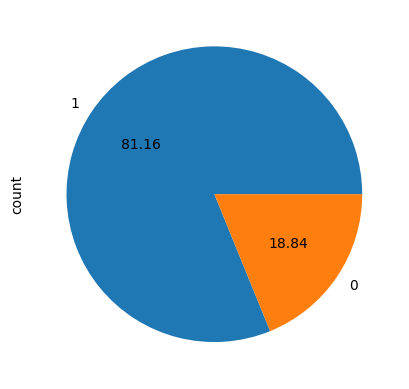

In [16]:
# show pie chart
y.value_counts().plot.pie(autopct = '%.2f')

([<matplotlib.patches.Wedge at 0x149a67f70>,
 [Text(-0.9128585078917412, 0.613750229791944, '1'),
  Text(0.9128585078917408, -0.6137502297919445, '0')],
 [Text(-0.49792282248640424, 0.3347728526137876, '81.16'),
  Text(0.497922822486404, -0.33477285261378786, '18.84')])

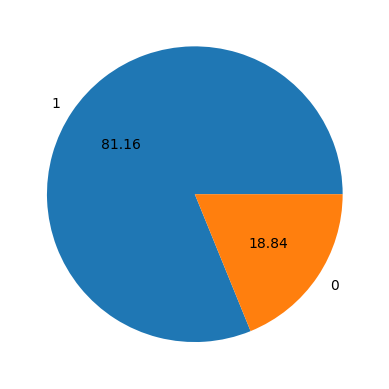

In [17]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct = '%.2f', labels = diploma_cnts.index)

### Class balancing

In [18]:
# split the data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 67)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42353, 15), (42353,), (10589, 15), (10589,))

<Axes: ylabel='count'>

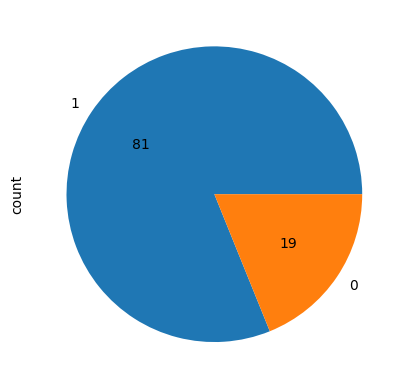

In [20]:
y_train.value_counts().plot.pie(autopct = '%2.f')

In [21]:
y_train.value_counts()

hs_diploma
1    34357
0     7996
Name: count, dtype: int64

### Create pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import make_column_selector as selector

numeric_features = X.select_dtypes(exclude = 'object').columns
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())]
)

categorical_features = X.select_dtypes(include='object').columns
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="object")),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ]
)

In [23]:
X.select_dtypes(exclude = 'object').columns

Index(['math_ss', 'read_ss', 'pct_days_absent', 'gpa', 'scale_score_11_eng',
       'scale_score_11_math', 'scale_score_11_read', 'scale_score_11_comp'],
      dtype='object')

In [24]:
models = {}

# Base
models['Baseline'] = 0

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# xgbppst
import xgboost as xgb
models['xgBoost'] = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [25]:
models

{'Baseline': 0,
 'Logistic Regression': LogisticRegression(),
 'Support Vector Machines': LinearSVC(),
 'Decision Trees': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Naive Bayes': GaussianNB(),
 'K-Nearest Neighbor': KNeighborsClassifier(),
 'xgBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
            

### Imbalanced Modeling

In [26]:
X_train = preprocessor.fit_transform(X_train)


In [27]:
X_test = preprocessor.transform(X_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    if models[key] == 0:
        ##baseline
        predictions = np.ones(len(y_test))
        accuracy[key] = accuracy_score(predictions, y_test)
        precision[key] = precision_score(predictions, y_test)
        recall[key] = recall_score(predictions, y_test)
    elif models[key] != 0:
        # Fit the classifier
        models[key].fit(X_train, y_train)
        # Make predictions
        predictions = models[key].predict(X_test)
        # Calculate metrics
        accuracy[key] = accuracy_score(predictions, y_test)
        precision[key] = precision_score(predictions, y_test)
        recall[key] = recall_score(predictions, y_test)

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Baseline,0.813108,1.000000,0.813108
Logistic Regression,0.855794,0.964228,0.871967
Support Vector Machines,0.854377,0.971545,0.865763
Decision Trees,0.848144,0.903252,0.909378
Random Forest,0.904051,0.951684,0.931772
Naive Bayes,0.747663,0.745528,0.930290
K-Nearest Neighbor,0.872509,0.926713,0.917337
xgBoost,0.906035,0.946458,0.938501


In [49]:
test = df_model['Accuracy'].idxmax()
print(f'{test}')



xgBoost


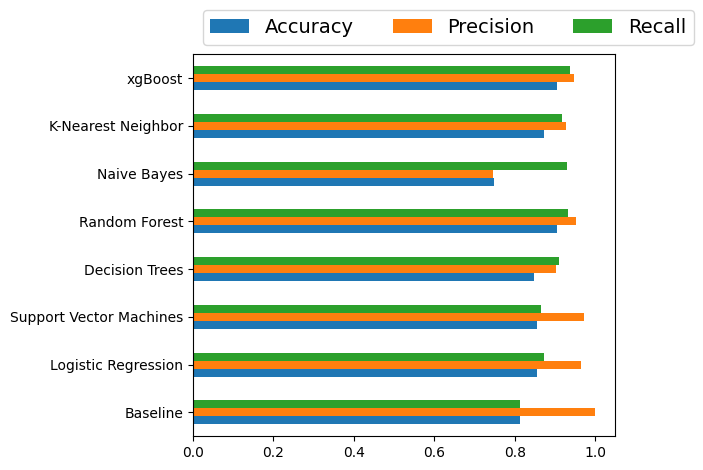

In [30]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

### Random Undersampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # numerical
#rus = RandomUnderSampler(sampling_strategy='not minority') # string

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [39]:
y_train_rus.value_counts()

hs_diploma
0    7996
1    7996
Name: count, dtype: int64

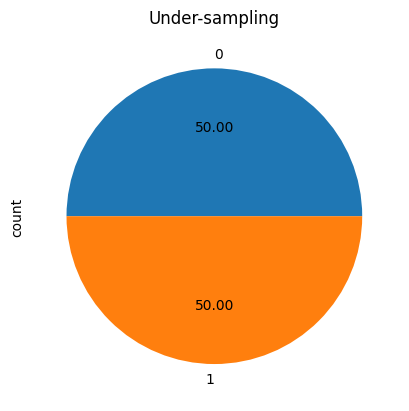

In [40]:
ax = y_train_rus.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling")

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    if models[key] == 0:
        ##baseline
        predictions = np.ones(len(y_test))
        accuracy[key] = accuracy_score(predictions, y_test)
        precision[key] = precision_score(predictions, y_test)
        recall[key] = recall_score(predictions, y_test)
    elif models[key] != 0:
        # Fit the classifier
        models[key].fit(X_train_rus, y_train_rus)
        # Make predictions
        predictions = models[key].predict(X_test)
        # Calculate metrics
        accuracy[key] = accuracy_score(predictions, y_test)
        precision[key] = precision_score(predictions, y_test)
        recall[key] = recall_score(predictions, y_test)

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Baseline,0.813108,1.000000,0.813108
Logistic Regression,0.765039,0.761440,0.937911
Support Vector Machines,0.764661,0.761324,0.937500
Decision Trees,0.780338,0.777700,0.942037
Random Forest,0.880631,0.891986,0.958323
Naive Bayes,0.707432,0.673751,0.952545
K-Nearest Neighbor,0.789310,0.780372,0.951835
xgBoost,0.870620,0.877352,0.960092


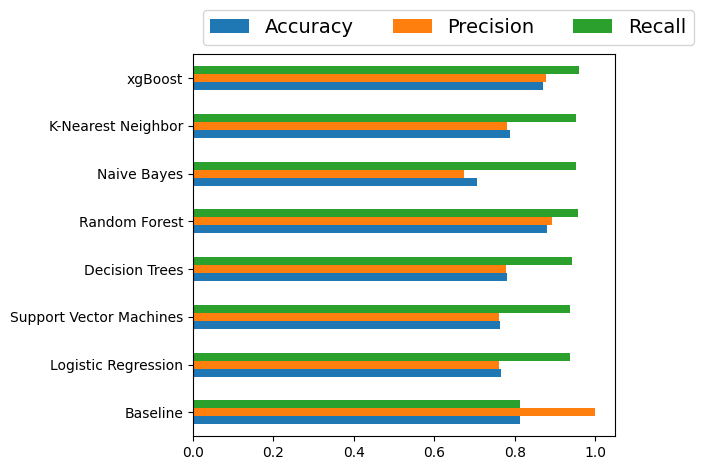

In [43]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

### Random Oversampling

In [44]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) # numerical
#rus = RandomOverSampler(sampling_strategy='not minority') # string

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


In [45]:
y_train_ros.value_counts()

hs_diploma
1    34357
0    34357
Name: count, dtype: int64

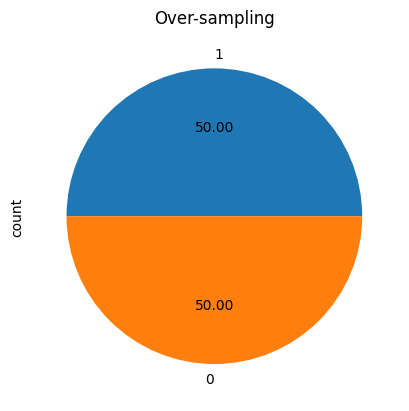

In [46]:
ax = y_train_ros.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over-sampling")

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    if models[key] == 0:
        ##baseline
        predictions = np.ones(len(y_test))
        accuracy[key] = accuracy_score(predictions, y_test)
        precision[key] = precision_score(predictions, y_test)
        recall[key] = recall_score(predictions, y_test)
    elif models[key] != 0:
        # Fit the classifier
        models[key].fit(X_train_ros, y_train_ros)
        # Make predictions
        predictions = models[key].predict(X_test)
        # Calculate metrics
        accuracy[key] = accuracy_score(predictions, y_test)
        precision[key] = precision_score(predictions, y_test)
        recall[key] = recall_score(predictions, y_test)

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [2]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

NameError: name 'pd' is not defined

NameError: name 'df_model' is not defined

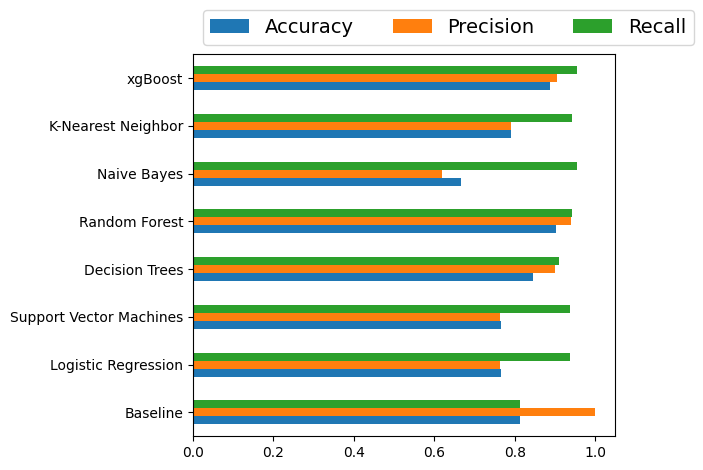

In [49]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

### Tune Model

In [50]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [51]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
Best score:  0.9051780468595055


In [52]:
import xgboost as xgb
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Define the hyperparameter space
space={'verbosity':0,
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }

In [53]:
# Classifier:
def objective(space):
    clf=xgb.XGBClassifier(verbosity = space['verbosity'],
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="error",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [54]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.9039569364434791                                     
  1%|          | 1/100 [00:00<00:15,  6.35trial/s, best loss: -0.9039569364434791]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                            
0.9038624988195297                                                                
SCORE:                                                                            
0.9039569364434791                                                                
  3%|▎         | 3/100 [00:00<00:14,  6.51trial/s, best loss: -0.9039569364434791]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                            
0.9019737463405421                                                                
SCORE:                                                                            
0.9019737463405421                                                                
  5%|▌         | 5/100 [00:00<00:14,  6.68trial/s, best loss: -0.9039569364434791]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                            
0.9018793087165927                                                                
SCORE:                                                                            
0.9041458116913779                                                                
  7%|▋         | 7/100 [00:01<00:16,  5.69trial/s, best loss: -0.9041458116913779]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                            
0.9039569364434791                                                                
  8%|▊         | 8/100 [00:01<00:15,  5.89trial/s, best loss: -0.9041458116913779]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9057512512985173                                                                
SCORE:                                                                            
0.9018793087165927                                                                
 10%|█         | 10/100 [00:01<00:15,  5.76trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9038624988195297                                                                 
 11%|█         | 11/100 [00:01<00:14,  6.05trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9041458116913779                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 13%|█▎        | 13/100 [00:02<00:14,  5.99trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9057512512985173                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 15%|█▌        | 15/100 [00:02<00:16,  5.26trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9019737463405421                                                                 
 17%|█▋        | 17/100 [00:02<00:13,  6.23trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9019737463405421                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 19%|█▉        | 19/100 [00:03<00:12,  6.31trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9040513740674284                                                                 
 20%|██        | 20/100 [00:03<00:12,  6.34trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9057512512985173                                                                 
 21%|██        | 21/100 [00:03<00:14,  5.55trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.905656813674568                                                                  
SCORE:                                                                             
0.9057512512985173                                                                 
 23%|██▎       | 23/100 [00:04<00:15,  4.93trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9038624988195297                                                                 
SCORE:                                                                             
0.9022570592123902                                                                 
 25%|██▌       | 25/100 [00:04<00:13,  5.59trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9057512512985173                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 27%|██▋       | 27/100 [00:04<00:13,  5.60trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9057512512985173                                                                 
 28%|██▊       | 28/100 [00:04<00:13,  5.27trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9057512512985173                                                                 
SCORE:                                                                             
0.9017848710926433                                                                 
 30%|███       | 30/100 [00:05<00:14,  4.99trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
 30%|███       | 30/100 [00:05<00:14,  4.99trial/s, best loss: -0.9057512512985173]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.9060345641703654                                                                 
SCORE:                                                                             
0.9040513740674284                                                                 
 32%|███▏      | 32/100 [00:05<00:12,  5.28trial/s, best loss: -0.9060345641703654]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9038624988195297                                                                 
 34%|███▍      | 34/100 [00:06<00:10,  6.10trial/s, best loss: -0.9060345641703654]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9018793087165927                                                                 
SCORE:                                                                             
0.9018793087165927                                                                 
 36%|███▌      | 36/100 [00:06<00:09,  6.47trial/s, best loss: -0.9060345641703654]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9061290017943149                                                                 
 37%|███▋      | 37/100 [00:06<00:11,  5.40trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9061290017943149                                                                 
SCORE:                                                                             
0.9040513740674284                                                                 
 39%|███▉      | 39/100 [00:07<00:12,  4.97trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
 40%|████      | 40/100 [00:07<00:11,  5.20trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9060345641703654                                                                 
SCORE:                                                                             
0.9038624988195297                                                                 
 42%|████▏     | 42/100 [00:07<00:11,  4.94trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9018793087165927                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 44%|████▍     | 44/100 [00:07<00:10,  5.56trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9019737463405421                                                                 
 46%|████▌     | 46/100 [00:08<00:09,  5.91trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9018793087165927                                                                 
SCORE:                                                                             
0.9040513740674284                                                                 
 48%|████▊     | 48/100 [00:08<00:08,  6.27trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9038624988195297                                                                 
SCORE:                                                                             
0.9040513740674284                                                                 
 50%|█████     | 50/100 [00:08<00:07,  6.37trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9045235621871753                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 52%|█████▏    | 52/100 [00:09<00:07,  6.11trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9038624988195297                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 54%|█████▍    | 54/100 [00:09<00:07,  6.00trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9038624988195297                                                                 
SCORE:                                                                             
0.9019737463405421                                                                 
 56%|█████▌    | 56/100 [00:09<00:06,  6.41trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9040513740674284                                                                 
SCORE:                                                                             
0.9045235621871753                                                                 
 58%|█████▊    | 58/100 [00:10<00:06,  6.08trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.8131079422041742                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 60%|██████    | 60/100 [00:10<00:05,  7.36trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9018793087165927                                                                 
SCORE:                                                                             
0.9057512512985173                                                                 
 62%|██████▏   | 62/100 [00:10<00:06,  6.18trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9042402493153272                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 64%|██████▍   | 64/100 [00:11<00:05,  6.04trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 


/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9060345641703654                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 67%|██████▋   | 67/100 [00:11<00:05,  5.85trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9060345641703654                                                                 
SCORE:                                                                             
0.9060345641703654                                                                 
 69%|██████▉   | 69/100 [00:12<00:06,  4.44trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9039569364434791                                                                 
 70%|███████   | 70/100 [00:12<00:06,  4.88trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9038624988195297                                                                 
SCORE:                                                                             
0.9040513740674284                                                                 
 72%|███████▏  | 72/100 [00:12<00:05,  5.59trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 74%|███████▍  | 74/100 [00:12<00:04,  5.94trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9057512512985173                                                                 
 76%|███████▌  | 76/100 [00:13<00:04,  5.61trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9040513740674284                                                                 
 77%|███████▋  | 77/100 [00:13<00:04,  5.74trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9029181225800359                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 79%|███████▉  | 79/100 [00:13<00:03,  5.33trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9040513740674284                                                                 
 81%|████████  | 81/100 [00:14<00:03,  5.95trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9019737463405421                                                                 
SCORE:                                                                             
0.9019737463405421                                                                 
 83%|████████▎ | 83/100 [00:14<00:03,  5.61trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9038624988195297                                                                 
 85%|████████▌ | 85/100 [00:14<00:02,  5.93trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9045235621871753                                                                 
 87%|████████▋ | 87/100 [00:15<00:02,  5.56trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9029181225800359                                                                 
 89%|████████▉ | 89/100 [00:15<00:01,  5.76trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9040513740674284                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 91%|█████████ | 91/100 [00:15<00:01,  5.84trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9018793087165927                                                                 
 93%|█████████▎| 93/100 [00:16<00:01,  6.49trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9039569364434791                                                                 
 95%|█████████▌| 95/100 [00:16<00:00,  6.67trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
SCORE:                                                                             
0.9045235621871753                                                                 
 97%|█████████▋| 97/100 [00:16<00:00,  6.51trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, u

SCORE:                                                                             
0.9039569364434791                                                                 
 98%|█████████▊| 98/100 [00:16<00:00,  6.83trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9060345641703654                                                                 
 99%|█████████▉| 99/100 [00:17<00:00,  4.76trial/s, best loss: -0.9061290017943149]

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9029181225800359                                                                 
100%|██████████| 100/100 [00:17<00:00,  5.68trial/s, best loss: -0.9061290017943149]


In [55]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7055649040625979, 'gamma': 6.528941578100736, 'max_depth': 11.0, 'min_child_weight': 7.0, 'reg_alpha': 40.0, 'reg_lambda': 0.0067382393835737076}


In [ ]:
diploma_cnts = y.value_counts()
diploma_cnts


In [87]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.7055649040625979, 'gamma': 6.528941578100736, 'max_depth': 11, 'min_child_weight': 7.0, 'reg_alpha': 40.0, 'reg_lambda': 0.0067382393835737076}
 
xgb_clf = xgb.XGBClassifier(
    objective = 'binary:logistic',colsample_bytree = 0.7055649040625979,
    gamma = 6.528941578100736, 
    max_depth = 11, 
    min_child_weight = 7.0,
    reg_alpha = 40.0, 
    reg_lambda =  0.0067382393835737076,
    random_state = 42
 )

In [88]:
# Fit the classifier
xgb_clf.fit(X_train, y_train)
# Make predictions
predictions = xgb_clf.predict(X_test)

In [89]:
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7055649040625979, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=6.528941578100736, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaves=None, min_child_weight=7.0, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [85]:
feat_imp = pd.DataFrame(xgb_clf.feature_importances_, preprocessor.get_feature_names_out())

Text(0, 0.5, 'Feature Importance Score')

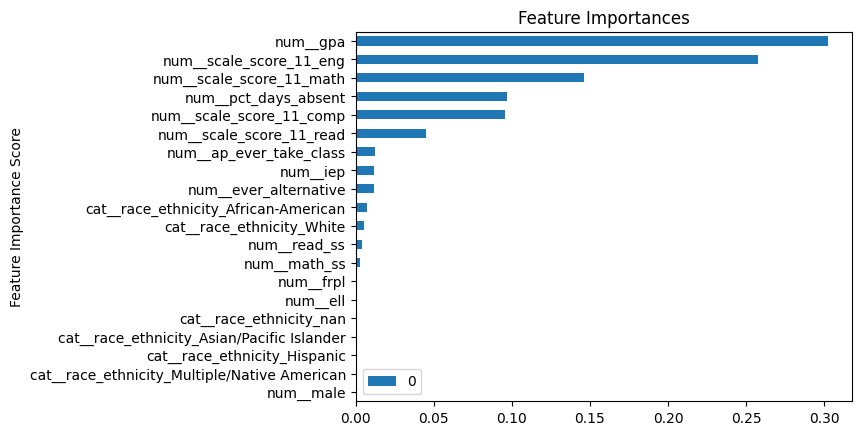

In [86]:
feat_imp.sort_values(0).plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

### feature importance / selection

Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

Support Vector Machines
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

Decision Trees
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  

Naive Bayes  
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB  

K-Nearest Neighbor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  

xgBoost
https://xgboost.readthedocs.io/en/stable/python/examples/index.html  